In [1]:
# Import libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the csv file for analysis.
train=pd.read_csv("train_set.csv")
train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [3]:
#Show data's columns
train.columns

Index(['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt', 'Item_Description',
       'Product_Category'],
      dtype='object')

In [4]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5288 non-null   int64  
 1   Vendor_Code       5288 non-null   object 
 2   GL_Code           5288 non-null   object 
 3   Inv_Amt           5288 non-null   float64
 4   Item_Description  5288 non-null   object 
 5   Product_Category  5288 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


(5288, 6)

In [5]:
train['Inv_Id'] = pd.Categorical(train.Inv_Id)
train['Vendor_Code'] = pd.Categorical(train.Vendor_Code)
train['GL_Code'] = pd.Categorical(train.GL_Code)
train['Product_Category'] = pd.Categorical(train.Product_Category)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Inv_Id            5288 non-null   category
 1   Vendor_Code       5288 non-null   category
 2   GL_Code           5288 non-null   category
 3   Inv_Amt           5288 non-null   float64 
 4   Item_Description  5288 non-null   object  
 5   Product_Category  5288 non-null   category
dtypes: category(4), float64(1), object(1)
memory usage: 366.4+ KB


In [6]:
train.shape

(5288, 6)

In [7]:
# Count null values
train.isnull().sum()


Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [8]:
train.describe()

,Inv_Amt
count,5288.000000
mean,49.890034
std,28.835716
min,0.010000
25%,25.062500
50%,49.560000
75%,74.945000
max,99.990000


In [9]:
# Summarize categorical features
train.describe(include=['category','object'])

,Inv_Id,Vendor_Code,GL_Code,Item_Description,Product_Category
count,5288,5288,5288,5288,5288
unique,5288,1206,9,5281,36
top,23010,VENDOR-1883,GL-6050310,Corning Inc /Ny Auto Leasing 2010-Feb Auto Le...,CLASS-1758
freq,1,322,1536,2,1421


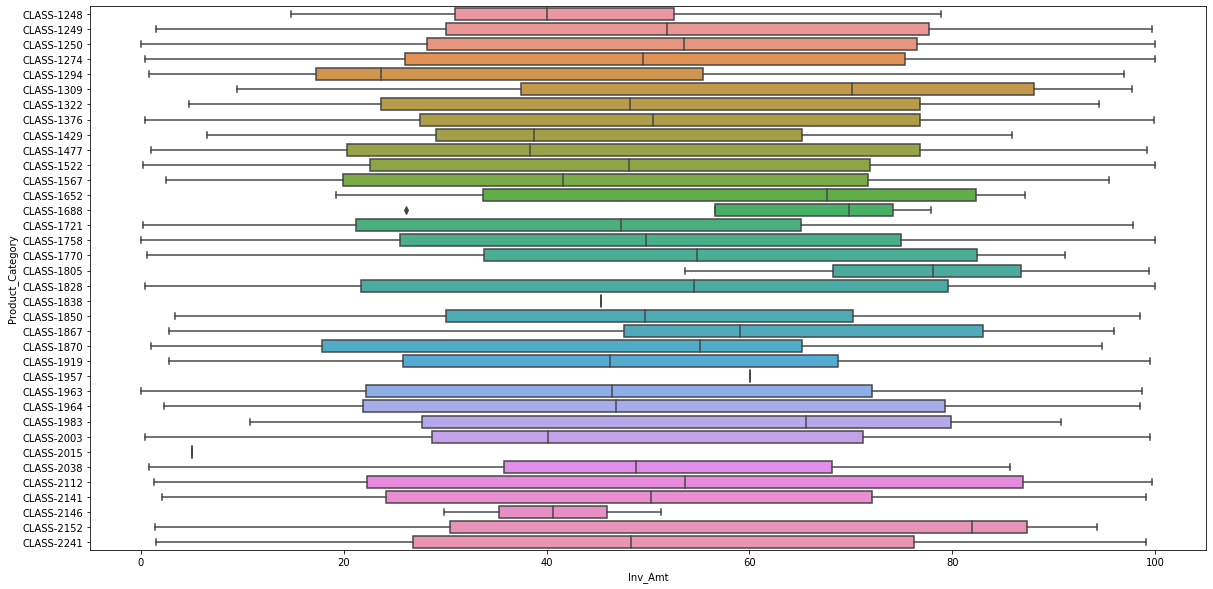

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = "Inv_Amt" ,y ="Product_Category" ,data= train)


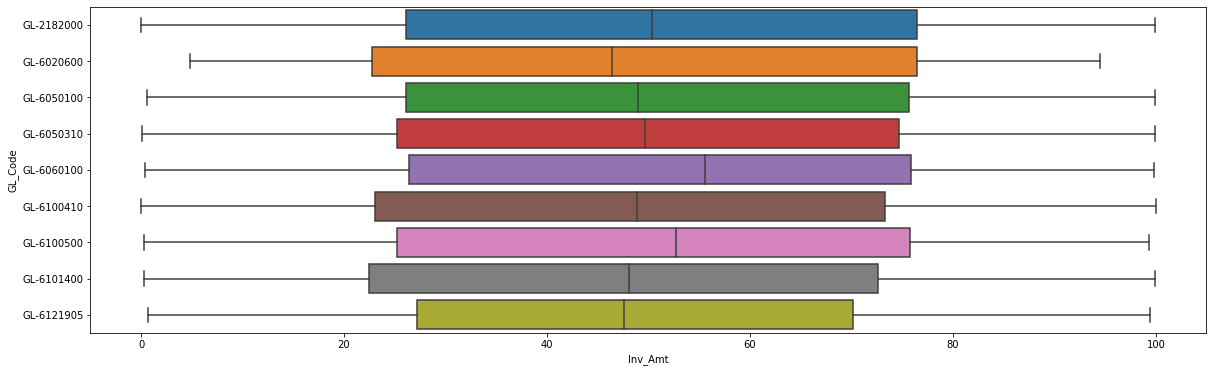

In [11]:
plt.figure(figsize=(20,6))
sns.boxplot(x = "Inv_Amt" ,y ="GL_Code" ,data= train)

In [12]:
plt.figure(figsize=(5,20))
grouped = train.groupby(['Product_Category'])
grouped.size().sort_values(ascending=False)

Product_Category
CLASS-1758    1421
CLASS-1274     939
CLASS-1522     803
CLASS-1250     440
CLASS-1376     347
CLASS-1963     215
CLASS-1249     167
CLASS-1828     107
CLASS-2141     103
CLASS-1721     103
CLASS-1567      80
CLASS-1919      61
CLASS-2112      52
CLASS-1850      51
CLASS-1477      48
CLASS-2241      36
CLASS-1870      35
CLASS-2003      31
CLASS-1309      31
CLASS-1429      30
CLASS-1322      28
CLASS-1964      27
CLASS-1294      24
CLASS-1770      19
CLASS-1983      16
CLASS-1867      15
CLASS-1652      14
CLASS-2038      13
CLASS-1805      10
CLASS-2152       9
CLASS-1688       4
CLASS-1248       4
CLASS-2146       2
CLASS-1838       1
CLASS-1957       1
CLASS-2015       1
dtype: int64

<Figure size 360x1440 with 0 Axes>

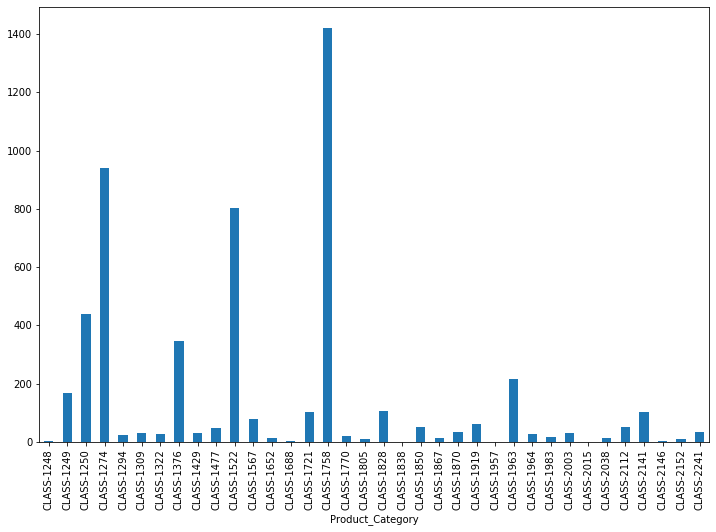

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,8))
train.groupby('Product_Category').Inv_Id.count().plot.bar(ylim=0) 

In [14]:
grouped = train.groupby(['GL_Code'])
grouped.size().sort_values(ascending=False)

GL_Code
GL-6050310    1536
GL-2182000    1248
GL-6050100     916
GL-6101400     759
GL-6100410     365
GL-6100500     204
GL-6060100     149
GL-6121905      80
GL-6020600      31
dtype: int64

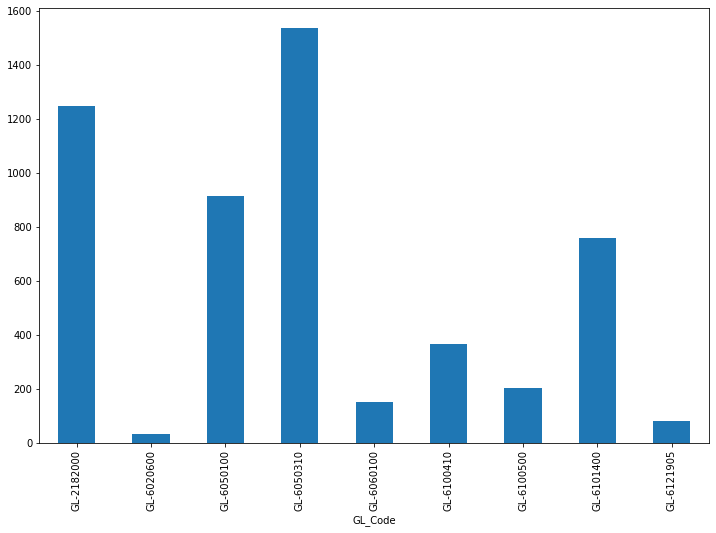

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,8))
train.groupby('GL_Code').Inv_Id.count().plot.bar(ylim=0)

In [16]:
grouped = train.groupby(['Vendor_Code'])
grouped.size().sort_values(ascending=False).head(10)

Vendor_Code
VENDOR-1883    322
VENDOR-1513    238
VENDOR-1944    170
VENDOR-1551    170
VENDOR-2513    158
VENDOR-1066    122
VENDOR-2408    110
VENDOR-1771    109
VENDOR-1873    107
VENDOR-1191     96
dtype: int64

In [17]:
grouped = train.groupby(['Vendor_Code'])
grouped.size().sort_values(ascending=False).tail(703)

Vendor_Code
VENDOR-1275    2
VENDOR-1323    2
VENDOR-1293    2
VENDOR-1516    1
VENDOR-1310    1
              ..
VENDOR-1899    1
VENDOR-1897    1
VENDOR-1896    1
VENDOR-1890    1
VENDOR-1000    1
Length: 703, dtype: int64

In [18]:
pvt=pd.pivot_table(train,index=["Product_Category"],values="Inv_Amt",aggfunc='sum').reset_index().rename(columns={'Inv_Amt': 'Total_Inv_Amt'}).sort_values(by='Total_Inv_Amt', ascending=False)
pvt

,Product_Category,Total_Inv_Amt
15,CLASS-1758,71136.15
3,CLASS-1274,47153.57
10,CLASS-1522,38624.53
2,CLASS-1250,22902.55
7,CLASS-1376,17814.97
25,CLASS-1963,10231.40
1,CLASS-1249,8688.27
18,CLASS-1828,5638.99
32,CLASS-2141,5021.15
14,CLASS-1721,4599.74


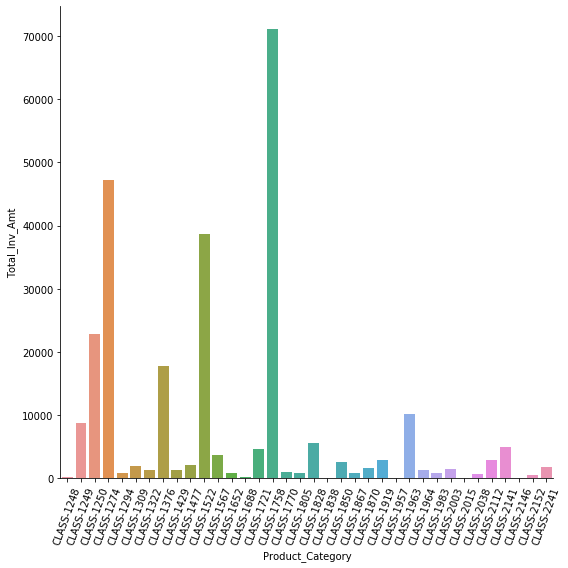

In [19]:
sns.catplot(x="Product_Category",y="Total_Inv_Amt",kind='bar',data=pvt,height=8)
plt.xticks(rotation=70)
plt.tight_layout()

In [20]:
P=pd.pivot_table(train,index=["Product_Category"],values="Inv_Amt",aggfunc='mean').reset_index().rename(columns={'Inv_Amt': 'Avg_Inv_Amt'}).sort_values(by='Avg_Inv_Amt', ascending=False)
P

,Product_Category,Avg_Inv_Amt
17,CLASS-1805,77.755000
5,CLASS-1309,63.235484
13,CLASS-1688,60.925000
24,CLASS-1957,60.040000
34,CLASS-2152,59.426667
12,CLASS-1652,58.552143
21,CLASS-1867,58.031333
27,CLASS-1983,54.671875
31,CLASS-2112,54.648654
16,CLASS-1770,52.800000


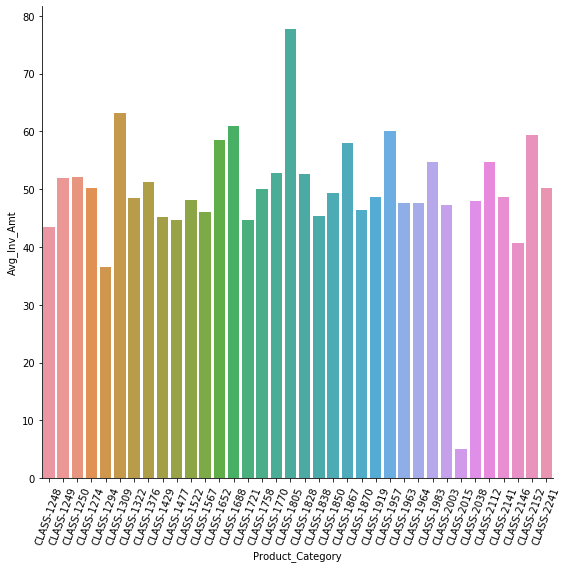

In [21]:
sns.catplot(x="Product_Category",y="Avg_Inv_Amt",kind='bar',data=P,height=8)
plt.xticks(rotation=70)
plt.tight_layout()

In [22]:
pd.pivot_table(train,index=["GL_Code"],values="Inv_Amt",aggfunc='sum').reset_index().rename(columns={'Inv_Amt': 'Total_Inv_Amt'}).sort_values(by='Total_Inv_Amt', ascending=False)

,GL_Code,Total_Inv_Amt
3,GL-6050310,76446.32
0,GL-2182000,63401.57
2,GL-6050100,45909.73
7,GL-6101400,36696.22
5,GL-6100410,17848.06
6,GL-6100500,10393.48
4,GL-6060100,7708.36
8,GL-6121905,3972.81
1,GL-6020600,1441.95


In [23]:
pd.pivot_table(train,index=["Vendor_Code"],values="Inv_Amt",aggfunc='sum').reset_index().rename(columns={'Inv_Amt': 'Total_Inv_Amt'}).sort_values(by='Total_Inv_Amt', ascending=False).head(10)

,Vendor_Code,Total_Inv_Amt
686,VENDOR-1883,16464.93
392,VENDOR-1513,11605.05
421,VENDOR-1551,8943.03
735,VENDOR-1944,8900.72
1172,VENDOR-2513,7563.67
1099,VENDOR-2408,6201.11
47,VENDOR-1066,5806.34
681,VENDOR-1873,5069.64
600,VENDOR-1771,5043.78
46,VENDOR-1065,4711.78


In [24]:
pd.pivot_table(train,index=["Vendor_Code"],values="Inv_Amt",aggfunc='mean').reset_index().rename(columns={'Inv_Amt': 'Avg_Inv_Amt'}).sort_values(by='Avg_Inv_Amt', ascending=False).head(10)

,Vendor_Code,Avg_Inv_Amt
534,VENDOR-1685,99.84
184,VENDOR-1245,99.48
646,VENDOR-1828,99.40
507,VENDOR-1653,99.03
545,VENDOR-1702,98.95
614,VENDOR-1788,98.95
528,VENDOR-1678,98.89
231,VENDOR-1311,98.61
880,VENDOR-2133,98.60
2,VENDOR-1005,98.59


In [25]:
pd.pivot_table(train,index=["Vendor_Code"],values="Inv_Amt",aggfunc='sum').reset_index().rename(columns={'Inv_Amt': 'Total_Inv_Amt'}).sort_values(by='Total_Inv_Amt', ascending=False).tail(10)

,Vendor_Code,Total_Inv_Amt
647,VENDOR-1829,1.24
1187,VENDOR-2536,1.19
711,VENDOR-1913,1.15
441,VENDOR-1574,1.11
958,VENDOR-2238,1.03
467,VENDOR-1606,1.00
357,VENDOR-1469,0.99
453,VENDOR-1589,0.55
775,VENDOR-1996,0.41
729,VENDOR-1936,0.40


In [26]:
pd.pivot_table(train,index=["Vendor_Code"],values="Inv_Amt",aggfunc='mean').reset_index().rename(columns={'Inv_Amt': 'Avg_Inv_Amt'}).sort_values(by='Avg_Inv_Amt', ascending=False).tail(10)

,Vendor_Code,Avg_Inv_Amt
647,VENDOR-1829,1.24
1187,VENDOR-2536,1.19
711,VENDOR-1913,1.15
441,VENDOR-1574,1.11
958,VENDOR-2238,1.03
467,VENDOR-1606,1.00
357,VENDOR-1469,0.99
453,VENDOR-1589,0.55
775,VENDOR-1996,0.41
729,VENDOR-1936,0.40


In [27]:
col=['GL_Code','Product_Category','Vendor_Code']
train[col].pivot_table(index=['GL_Code','Product_Category'], aggfunc='count').reset_index().rename(columns={'Vendor_Code': 'count_category'}).sort_values(by='count_category', ascending=False)


,GL_Code,Product_Category,count_category
20,GL-6050310,CLASS-1758,1421.0
17,GL-6050100,CLASS-1274,901.0
35,GL-6101400,CLASS-1522,707.0
2,GL-2182000,CLASS-1250,440.0
4,GL-2182000,CLASS-1376,347.0
28,GL-6100410,CLASS-1963,215.0
1,GL-2182000,CLASS-1249,167.0
27,GL-6100410,CLASS-1828,107.0
12,GL-2182000,CLASS-2141,103.0
31,GL-6100500,CLASS-1721,103.0


In [28]:
pd.set_option("display.max_rows", None)
col=['GL_Code','Product_Category','Vendor_Code','Inv_Id']
pivot=train[col].pivot_table(index=['Product_Category','GL_Code','Vendor_Code'], aggfunc='count').reset_index().rename(columns={'Inv_Id': 'frequency'}).sort_values(by='frequency', ascending=False)
pivot

,Product_Category,GL_Code,Vendor_Code,frequency
28,CLASS-1250,GL-2182000,VENDOR-1883,320.0
956,CLASS-1758,GL-6050310,VENDOR-1513,236.0
986,CLASS-1758,GL-6050310,VENDOR-2513,158.0
942,CLASS-1758,GL-6050310,VENDOR-1066,122.0
17,CLASS-1249,GL-2182000,VENDOR-1944,121.0
27,CLASS-1250,GL-2182000,VENDOR-1551,117.0
982,CLASS-1758,GL-6050310,VENDOR-2408,110.0
817,CLASS-1522,GL-6101400,VENDOR-1771,109.0
971,CLASS-1758,GL-6050310,VENDOR-1873,107.0
751,CLASS-1522,GL-6101400,VENDOR-1191,96.0


In [29]:
pivot[pivot["Vendor_Code"] == "VENDOR-1096"]

,Product_Category,GL_Code,Vendor_Code,frequency
1146,CLASS-1964,GL-2182000,VENDOR-1096,2.0
1211,CLASS-2141,GL-2182000,VENDOR-1096,1.0
60,CLASS-1274,GL-6050100,VENDOR-1096,1.0


In [30]:
train.groupby(['Product_Category', 'GL_Code'])['Inv_Amt'].aggregate('sum').unstack()

GL_Code,GL-2182000,GL-6020600,GL-6050100,GL-6050310,GL-6060100,GL-6100410,GL-6100500,GL-6101400,GL-6121905
Product_Category,,,,,,,,,
CLASS-1248,173.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1249,8688.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1250,22902.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1274,NaN,NaN,45098.06,NaN,2055.51,NaN,NaN,NaN,NaN
CLASS-1294,877.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1309,NaN,NaN,NaN,NaN,NaN,NaN,1960.30,NaN,NaN
CLASS-1322,NaN,1355.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1376,17814.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS-1429,NaN,NaN,NaN,NaN,NaN,1354.79,NaN,NaN,NaN


In [31]:
# Plot bar plot for each categorical feature
categorical_features = train.select_dtypes(include=['category']).columns.tolist()
categorical_features[1:4]

['Vendor_Code', 'GL_Code', 'Product_Category']

In [32]:
 #Multi-Variate Analysis of Categorical variables through Cross-Tab
pd.crosstab(index=train["GL_Code"],columns=train["Product_Category"],normalize="index")


Product_Category,CLASS-1248,CLASS-1249,CLASS-1250,CLASS-1274,CLASS-1294,CLASS-1309,CLASS-1322,CLASS-1376,CLASS-1429,CLASS-1477,...,CLASS-1964,CLASS-1983,CLASS-2003,CLASS-2015,CLASS-2038,CLASS-2112,CLASS-2141,CLASS-2146,CLASS-2152,CLASS-2241
GL_Code,,,,,,,,,,,,,,,,,,,,,
GL-2182000,0.003205,0.133814,0.352564,0.000000,0.019231,0.000000,0.000000,0.278045,0.000000,0.038462,...,0.021635,0.000000,0.02484,0.000000,0.000000,0.000000,0.082532,0.000000,0.000000,0.028846
GL-6020600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.903226,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.032258,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000
GL-6050100,0.000000,0.000000,0.000000,0.983624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016376,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GL-6050310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GL-6060100,0.000000,0.000000,0.000000,0.255034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006711,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GL-6100410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082192,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.035616,0.000000,0.000000,0.000000,0.000000,0.000000
GL-6100500,0.000000,0.000000,0.000000,0.000000,0.000000,0.151961,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000
GL-6101400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.068511,0.000000,0.000000,0.000000,0.000000
GL-6121905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
pd.crosstab(index=train["Product_Category"],columns=train["GL_Code"],normalize="index")

GL_Code,GL-2182000,GL-6020600,GL-6050100,GL-6050310,GL-6060100,GL-6100410,GL-6100500,GL-6101400,GL-6121905
Product_Category,,,,,,,,,
CLASS-1248,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1249,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1250,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1274,0.0,0.0,0.959531,0.0,0.040469,0.0,0.0,0.000000,0.0
CLASS-1294,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1309,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
CLASS-1322,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1376,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
CLASS-1429,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.0


In [34]:
###ML model

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True,
                       min_df = 5,
                       norm= 'l2',
                       ngram_range= (1,2),
                       stop_words ='english')

In [36]:
features = tfidf.fit_transform(train.Item_Description).toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
labels = train.Product_Category
features.shape

(5288, 2022)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['Item_Description'], train['Product_Category'], random_state= 0)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_counts = count_vect.fit_transform(X_train);X_train_counts
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts);X_train_tfidf 

<3966x1878 sparse matrix of type '<class 'numpy.float64'>'
	with 52620 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [42]:
clf.score(count_vect.transform(X_test), y_test)


0.9969742813918305

In [43]:
##To check if theree is significant changes within accuracy by applying cross-validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf,count_vect.transform(X_test), y_test, scoring='accuracy', cv = 5)
print(accuracy)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.99622642 0.99245283 0.99621212 1.         1.        ]


In [44]:
####To verify our model output with training set
print(clf.predict(count_vect.transform(['Three Five Systems Inc Retirement and Pension Funds 2017-Nov Benefits Human Resources Corporate Services'])))
train[train["Item_Description"] == "Three Five Systems Inc Retirement and Pension Funds 2017-Nov  Benefits Human Resources Corporate Services"]

['CLASS-2003']


,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
4038,21118,VENDOR-2559,GL-2182000,29.46,Three Five Systems Inc Retirement and Pension ...,CLASS-2003


In [45]:
print(clf.predict(count_vect.transform(['Non-Procurable Royalties Associated Banc-Corp Miscellaneous Non-Procurable Royalties 2015-Jun'])))
train[train["Item_Description"] == "Non-Procurable Royalties Associated Banc-Corp Miscellaneous Non-Procurable Royalties 2015-Jun "]

['CLASS-2015']


,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
3290,20021,VENDOR-1288,GL-6020600,5.04,Non-Procurable Royalties Associated Banc-Corp ...,CLASS-2015


In [46]:
###predicting class of a single item_description from test data 
print(clf.predict(count_vect.transform(['May 2014 Fortune National Corp Miscellaneous Company Car (Field Only) Miscellaneous Company Car (Field Only) Travel and Entertainment Ground Transportation'])))


['CLASS-1758']


In [47]:
y_pred = clf.predict(count_vect.transform(X_test));y_pred

array(['CLASS-1274', 'CLASS-1758', 'CLASS-1758', ..., 'CLASS-1758',
       'CLASS-1522', 'CLASS-1250'], dtype=object)

In [48]:
df = pd.read_csv("test_set.csv");df

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15041,VENDOR-1181,GL-6050100,88.80,Base Rent Store Management Aig Equity Sales Co...
1,15094,VENDOR-1554,GL-6100410,80.08,Prototype and Comp Production/Packaging Design...
2,15112,VENDOR-1513,GL-6050310,24.23,Ground Transportation Travel and Entertainment...
3,15179,VENDOR-1044,GL-6101400,38.85,Store Construction General Requirements Advanc...
4,15212,VENDOR-1114,GL-6050310,94.15,Travel and Entertainment Miscellaneous Company...
5,15312,VENDOR-1406,GL-6020600,1.96,Belo & Co 2019Jan Non-Procurable Miscellaneous...
6,15316,VENDOR-1883,GL-2182000,91.40,Corporate Services Auto Leasing Other Corporat...
7,15346,VENDOR-1640,GL-6050100,0.16,2003-Apr Foremost Corp Of America Base Rent L...
8,15399,VENDOR-1509,GL-6101400,66.85,Store Construction General Requirements Bromar...
9,15422,VENDOR-2229,GL-6060100,99.89,General Contractor Facility Construction Gener...


In [49]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred, labels= train.Product_Category, target_names=train['Product_Category'].unique()))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1989: UserWarning: labels size, 5288, does not match size of target_names, 36
  .format(len(labels), len(target_names))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  CLASS-1963       1.00      1.00      1.00        60
  CLASS-1250       1.00      1.00      1.00       120
  CLASS-1274       1.00      1.00      1.00       247
  CLASS-1522       1.00      1.00      1.00       194
  CLASS-1376       1.00      1.00      1.00        88
  CLASS-1758       1.00      1.00      1.00       194
  CLASS-2141       1.00      1.00      1.00       360
  CLASS-1429       1.00      1.00      1.00       194
  CLASS-1652       1.00      1.00      1.00        60
  CLASS-1249       1.00      1.00      1.00       247
  CLASS-1721       1.00      1.00      1.00       360
  CLASS-1870       1.00      1.00      1.00       247
  CLASS-1828       1.00      1.00      1.00       247
  CLASS-2112       1.00      1.00      1.00        25
  CLASS-1567       1.00      1.00      1.00       194
  CLASS-1309       1.00      1.00      1.00       360
  CLASS-1477       1.00      1.00      1.00       194
  CLASS-1805       1.00    

In [50]:
predictions = clf.predict(count_vect.transform(df['Item_Description']));predictions

array(['CLASS-1274', 'CLASS-1963', 'CLASS-1758', 'CLASS-1522',
       'CLASS-1758', 'CLASS-2015', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1522', 'CLASS-1522', 'CLASS-1274', 'CLASS-1567',
       'CLASS-1376', 'CLASS-1274', 'CLASS-1758', 'CLASS-1758',
       'CLASS-1850', 'CLASS-1758', 'CLASS-1274', 'CLASS-1758',
       'CLASS-1963', 'CLASS-1828', 'CLASS-1250', 'CLASS-1828',
       'CLASS-1758', 'CLASS-1294', 'CLASS-1758', 'CLASS-1919',
       'CLASS-1758', 'CLASS-1652', 'CLASS-1850', 'CLASS-1274',
       'CLASS-1274', 'CLASS-2141', 'CLASS-1758', 'CLASS-1758',
       'CLASS-1758', 'CLASS-1274', 'CLASS-1758', 'CLASS-1274',
       'CLASS-1274', 'CLASS-1274', 'CLASS-1274', 'CLASS-1522',
       'CLASS-1963', 'CLASS-1522', 'CLASS-1522', 'CLASS-1522',
       'CLASS-1919', 'CLASS-1274', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1522', 'CLASS-2141', 'CLASS-1274', 'CLASS-1870',
       'CLASS-1274', 'CLASS-1522', 'CLASS-1522', 'CLASS-1758',
       'CLASS-1758', 'CLASS-1522', 'CLASS-1758', 'CLASS

In [52]:
res = clf.score(count_vect.transform(train['Item_Description']),train['Product_Category']);res
###since the accuracy is calculated from whole data .i.e. [training set+testing set] ,
#so it is obivious that accuracy will increase from 
#Out[85]:
#0.9969742813918305

0.999054462934947

In [54]:
##Code to generate submission.csv
df = pd.read_csv("test_set.csv")
pd.DataFrame(data={"Inv_Id":df['Inv_Id'],"Product_Category":clf.predict(count_vect.transform(df['Item_Description']))}).to_csv('submission.csv',index=False)

In [55]:
 output= pd.read_csv("submission.csv");output

,Inv_Id,Product_Category
0,15041,CLASS-1274
1,15094,CLASS-1963
2,15112,CLASS-1758
3,15179,CLASS-1522
4,15212,CLASS-1758
5,15312,CLASS-2015
6,15316,CLASS-1250
7,15346,CLASS-1274
8,15399,CLASS-1522
9,15422,CLASS-1522
